In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib_venn import venn2, venn2_circles, venn3, venn3_circles
import numpy as np
pd.options.display.max_rows = 4000

### Data

In [2]:
test_coverage = pd.read_csv('../data/saleorSchemaCoverageDictionaryExistingTests.csv')
prod_coverage = pd.read_csv('../data/saleorSchemaCoverageDictionary.csv')

In [3]:
print("Number of schema tuples in test and production:", test_coverage.shape[0]
      if (test_coverage.shape[0] == prod_coverage.shape[0]) 
      else "Unequal number of tuples")

Number of schema tuples in test and production: 1884


In [4]:
test_coverage.head(5)

,schemaTuple,visited,timesVisited,id
0,querywebhook,True,4,9781e200-b06e-5a2c-983f-70c2a5558140
1,querywebhookevents,True,1,269c20ec-01d1-5cea-bccf-d139f87b8f6a
2,querywebhooksamplepayload,True,12,8042b3cc-e3ba-5981-b532-61dc9d332458
3,querywarehouse,True,4,cfd56b12-0dfc-5f3b-9a9a-5459493fd0a6
4,querywarehouses,True,12,fdf9db64-f36c-5304-8935-2d37f26a8a24


In [5]:
prod_coverage.head(5)

,schemaTuple,visited,timesVisited,id
0,querywebhook,True,2,60266ab2-c801-5b24-8323-04c77978eaaf
1,querywebhookevents,False,0,NaN
2,querywebhooksamplepayload,False,0,NaN
3,querywarehouse,True,4,b745eb61-8ebb-5dfe-86cd-c5df52821d23
4,querywarehouses,True,6,8066442d-d5c3-54fe-bea1-3caaab6410ec


### Analysis

In [6]:
print("Are test and production coverage the same:", test_coverage.equals(prod_coverage))

Are test and production coverage the same: False


In [7]:
covered_in_test = test_coverage[test_coverage.visited == True].shape[0]
covered_in_prod = prod_coverage[prod_coverage.visited == True].shape[0]

print("=== Excluding tuples covered by mutation queries ===")
print("Number of tuples covered by the test suite:", covered_in_test)
print("Percentage of schema tuples covered by the test suite:", (covered_in_test/test_coverage.shape[0]) * 100)

print("Number of tuples covered in production:", covered_in_prod)
print("Percentage of schema tuples covered in production:", (covered_in_prod/prod_coverage.shape[0]) * 100)

=== Excluding tuples covered by mutation queries ===
Number of tuples covered by the test suite: 728
Percentage of schema tuples covered by the test suite: 38.6411889596603
Number of tuples covered in production: 506
Percentage of schema tuples covered in production: 26.857749469214436


In [8]:
only_covered_in_test = test_coverage[(prod_coverage.visited == False) & 
                                     (test_coverage.visited == True)]

print("Number of tuples covered in test but not in production:", only_covered_in_test.shape[0])

Number of tuples covered in test but not in production: 260


In [9]:
covered_by_both = prod_coverage[(prod_coverage.visited == True) & (test_coverage.visited == True)]
print("Tuples covered by both test and production queries:", covered_by_both.shape[0])

Tuples covered by both test and production queries: 468


In [10]:
only_covered_in_prod = prod_coverage[(prod_coverage.visited == True) & 
                                     (test_coverage.visited == False)]

print("Number of tuples covered in production but not by original tests:", only_covered_in_prod.shape[0])

Number of tuples covered in production but not by original tests: 38


In [11]:
only_covered_in_prod

,schemaTuple,visited,timesVisited,id
51,querytaxtypes,True,2,2367594c-e4f7-5fb3-9d1d-780a31269703
70,webhooktargeturl,True,2,60266ab2-c801-5b24-8323-04c77978eaaf
72,webhooksecretkey,True,2,60266ab2-c801-5b24-8323-04c77978eaaf
75,webhookapp,True,3,60266ab2-c801-5b24-8323-04c77978eaaf
119,appversion,True,1,15d37756-9074-5ae7-8ae0-d002b9b3c916
121,apptokenname,True,1,15d37756-9074-5ae7-8ae0-d002b9b3c916
123,apptokenid,True,1,15d37756-9074-5ae7-8ae0-d002b9b3c916
140,shippingzonecountableconnectionpageinfo,True,1,8e3d7973-6525-520c-9788-e69dca22add3
230,productchargetaxes,True,1,2367594c-e4f7-5fb3-9d1d-780a31269703
234,productdefaultvariant,True,3,2367594c-e4f7-5fb3-9d1d-780a31269703


### Merged test and production coverage reports

In [12]:
merged_df = pd.merge(test_coverage, prod_coverage, on='schemaTuple')
merged_df = merged_df.rename(columns={"visited_x": "visitedTest", 
                                      "visited_y": "visitedProd", 
                                      "timesVisited_x": "timesVisitedTest", 
                                      "timesVisited_y": "timesVisitedProd"})

In [13]:
merged_df

,schemaTuple,visitedTest,timesVisitedTest,id_x,visitedProd,timesVisitedProd,id_y
0,querywebhook,True,4,9781e200-b06e-5a2c-983f-70c2a5558140,True,2,60266ab2-c801-5b24-8323-04c77978eaaf
1,querywebhookevents,True,1,269c20ec-01d1-5cea-bccf-d139f87b8f6a,False,0,NaN
2,querywebhooksamplepayload,True,12,8042b3cc-e3ba-5981-b532-61dc9d332458,False,0,NaN
3,querywarehouse,True,4,cfd56b12-0dfc-5f3b-9a9a-5459493fd0a6,True,4,b745eb61-8ebb-5dfe-86cd-c5df52821d23
4,querywarehouses,True,12,fdf9db64-f36c-5304-8935-2d37f26a8a24,True,6,8066442d-d5c3-54fe-bea1-3caaab6410ec
5,querytranslations,True,12,0f5cebd6-736b-5b70-822f-2d0c55d915ad,False,0,NaN
6,querytranslation,True,24,08d2356c-c085-57f0-97c7-bd2e226ee9ff,False,0,NaN
7,querystock,True,2,d3524127-edde-5f68-ba0b-32409826c532,False,0,NaN
8,querystocks,True,6,2fea8b12-9859-5808-9da6-20d6f1d51c07,False,0,NaN
9,queryshop,True,31,e18b7936-1718-5015-aa16-6d3936cb26d5,True,9,3294a9bc-8752-515f-aff2-daac7c736598


In [14]:
merged_df.to_csv('../data/merged-schema-coverage-dictionary.csv')

(0, 0, 0, 1118, 260, 38, 468)


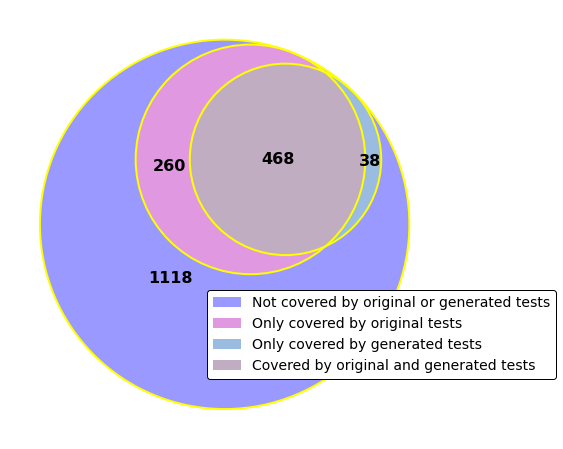

In [15]:
schema_sets = (0, 0, 0, 
               (test_coverage.shape[0] - (covered_in_test + only_covered_in_prod.shape[0])), 
               only_covered_in_test.shape[0], 
               only_covered_in_prod.shape[0], covered_by_both.shape[0])

print(schema_sets)

ax = plt.figure(figsize=(8, 8))
schema_venn = venn3(subsets=schema_sets,
                    set_labels = ('Original test suite', 'Generated test suite', 'Total'))

venn3_circles(subsets=schema_sets, linestyle="-", linewidth=2, color='yellow')

for text in schema_venn.set_labels:
    text.set_fontsize(16)
    text.set_text("")
    
for x in range(len(schema_venn.subset_labels)):
    if schema_venn.subset_labels[x] is not None:
        schema_venn.subset_labels[x].set_fontsize(16)
        schema_venn.subset_labels[x].set_fontweight("bold")

h = []
for i in range(len(schema_venn.patches)):
    if schema_venn.patches[i] is not None:
        h.append(schema_venn.patches[i])
        
ax.legend(handles = h, 
          labels=["Not covered by original or generated tests", "Only covered by original tests", "Only covered by generated tests", "Covered by original and generated tests"], 
          bbox_to_anchor=(0.5, 0., 0.6, 0.4),
          fontsize=14,
          framealpha=1,
          edgecolor='black')

plt.savefig('../data/schema-venn.pdf', bbox_inches='tight', pad_inches=0)

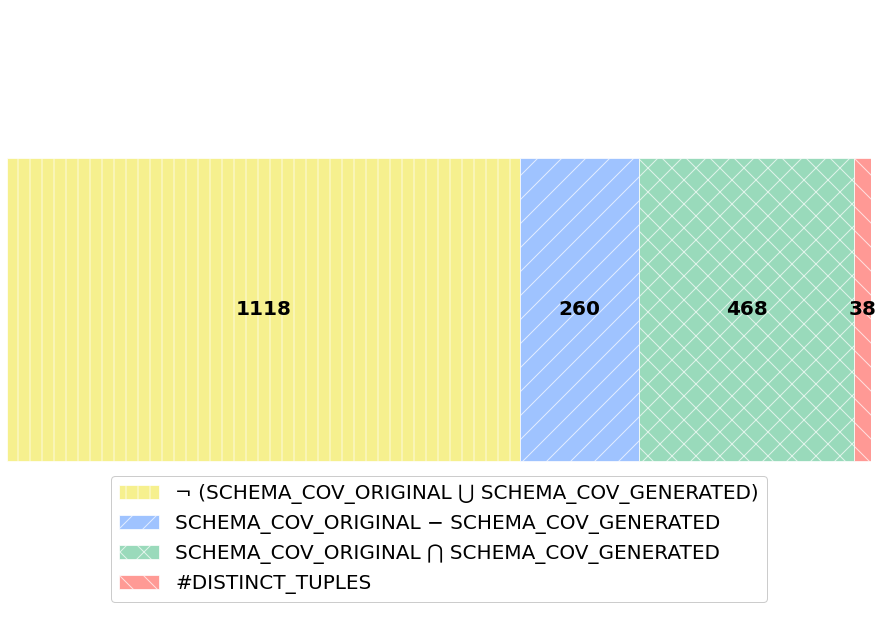

In [16]:
category_names = ['Tuples']

results = {'¬ (SCHEMA_COV_ORIGINAL ⋃ SCHEMA_COV_GENERATED)': 1118,
           'SCHEMA_COV_ORIGINAL − SCHEMA_COV_GENERATED': 260,
           'SCHEMA_COV_ORIGINAL ⋂ SCHEMA_COV_GENERATED': 468,
           '#DISTINCT_TUPLES': 38}

colors=['#f3ea5f', '#77aaff', '#6fcb9f', '#ff6f69']
hatches=['|', '/', 'x', '\\']
df = pd.DataFrame(results, index=category_names)
ax = df.plot.barh(stacked=True, color=colors, figsize=(12, 12), fontsize=20, edgecolor='white', alpha=0.7)

for i, bar in enumerate(ax.patches):
    bar.set_hatch(hatches[i])

for c in ax.containers:
    # format the number of decimal places and replace 0 with an empty string
    labels = [f'{w:.0f}' if (w := v.get_width()) > 0 else '' for v in c ]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=20, color='black', fontweight='bold')
    
ax.legend(fontsize=20, framealpha=1, loc='lower center')

plt.gca().set_axis_off()
plt.subplots_adjust(top = 0.7, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0, 0)
ax.margins(0, 0)
plt.savefig('../data/schema-venn-rect.pdf', bbox_inches='tight', pad_inches=0)

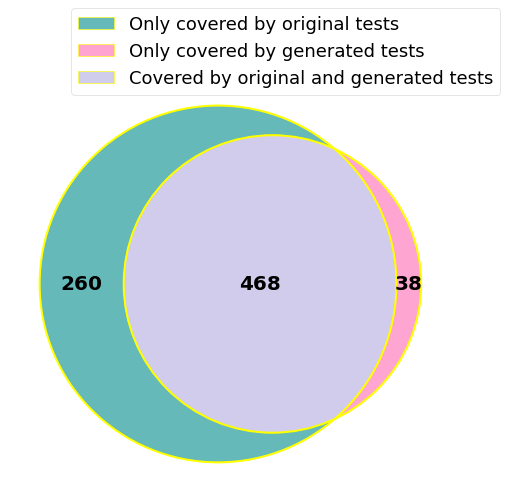

In [17]:
schema_sets = (only_covered_in_test.shape[0], only_covered_in_prod.shape[0], covered_by_both.shape[0])

ax = plt.figure(figsize=(8, 8))
schema_venn = venn2(subsets=schema_sets,
                    set_labels = ('Original test suite', 'Generated test suite'),
                    set_colors=('darkcyan', 'hotpink'), alpha = 0.6)


venn2_circles(subsets=schema_sets, linestyle="-", linewidth=2, color='yellow')

for text in schema_venn.set_labels:
    text.set_fontsize(16)
    text.set_text("")
    
for x in range(len(schema_venn.subset_labels)):
    if schema_venn.subset_labels[x] is not None:
        schema_venn.subset_labels[x].set_fontsize(20)
        schema_venn.subset_labels[x].set_fontweight("bold")

h = []
for i in range(len(schema_venn.patches)):
    if schema_venn.patches[i] is not None:
        schema_venn.patches[i].set_edgecolor('yellow')
        h.append(schema_venn.patches[i])

schema_labels = ["SCHEMA_COV_ORIGINAL − SCHEMA_COV_GENERATED", 
                 "SCHEMA_COV_ORIGINAL ⋂ SCHEMA_COV_GENERATED",
                 "#DISTINCT_TUPLES"]
                 
ax.legend(handles = h, 
          labels=["Only covered by original tests", "Only covered by generated tests", "Covered by original and generated tests"], 
          fontsize=18,
          framealpha=0.1,
          edgecolor='black')

plt.savefig('../data/schema-venn2.pdf', bbox_inches='tight', pad_inches=0)